In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('MyTransaction.csv')

In [5]:
df.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23


In [7]:
df.tail()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
1465,13/12/23,Food,3.71E+11,13/12/23,26.0,0.0,46.68
1466,13/12/23,Food,3.71E+11,13/12/23,15.0,0.0,31.68
1467,13/12/23,Transport,3.35E+11,13/12/23,0.0,1718.0,1749.68
1468,13/12/23,Misc,3.71E+11,13/12/23,1718.0,0.0,31.68
1469,1/1/2024,Misc,0,31/12/23,0.0,8.0,39.68


## Data preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1469 non-null   object 
 1   Category    1469 non-null   object 
 2   RefNo       1469 non-null   object 
 3   Date.1      1469 non-null   object 
 4   Withdrawal  1469 non-null   float64
 5   Deposit     1469 non-null   float64
 6   Balance     1469 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.5+ KB


In [12]:
df.isnull().sum()

Date          1
Category      1
RefNo         1
Date.1        1
Withdrawal    1
Deposit       1
Balance       1
dtype: int64

In [14]:
# first row has null value so i am dropping it
df.dropna(inplace = True)

In [16]:
df.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23
5,3/1/2023,Misc,3.37E+11,3/1/2023,1.0,0.0,1730.23


In [18]:
# Date and Date.1 is duplicate columns let's check its value
sum(df['Date'] == df['Date.1'])

1447

In [20]:
df.shape

(1469, 7)

In [22]:
## We can see that we have 1469 values of which 1447 values are same in both the columns so i am dropping one of the columns.Also, i am dropping RefNo

df.drop(columns = ['Date.1','RefNo'],inplace = True)

In [24]:
df

,Date,Category,Withdrawal,Deposit,Balance
1,1/1/2023,Rent,3950.0,0.0,1837.23
2,3/1/2023,Misc,105.0,0.0,1732.23
3,3/1/2023,Misc,0.0,55.0,1787.23
4,3/1/2023,Food,56.0,0.0,1731.23
5,3/1/2023,Misc,1.0,0.0,1730.23
...,...,...,...,...,...
1465,13/12/23,Food,26.0,0.0,46.68
1466,13/12/23,Food,15.0,0.0,31.68
1467,13/12/23,Transport,0.0,1718.0,1749.68
1468,13/12/23,Misc,1718.0,0.0,31.68


In [26]:
## Convert date columns to datetime format
df['Date'] = pd.to_datetime(df['Date'] , format = "mixed",dayfirst=True)

In [28]:
df

,Date,Category,Withdrawal,Deposit,Balance
1,2023-01-01,Rent,3950.0,0.0,1837.23
2,2023-01-03,Misc,105.0,0.0,1732.23
3,2023-01-03,Misc,0.0,55.0,1787.23
4,2023-01-03,Food,56.0,0.0,1731.23
5,2023-01-03,Misc,1.0,0.0,1730.23
...,...,...,...,...,...
1465,2023-12-13,Food,26.0,0.0,46.68
1466,2023-12-13,Food,15.0,0.0,31.68
1467,2023-12-13,Transport,0.0,1718.0,1749.68
1468,2023-12-13,Misc,1718.0,0.0,31.68


In [34]:
missing_values = df.isnull().sum()
missing_values 

Date          0
Category      0
Withdrawal    0
Deposit       0
Balance       0
dtype: int64

In [38]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Date,Withdrawal,Deposit,Balance
count,1469,1469.000000,1469.000000,1469.000000
mean,2023-05-23 17:11:13.927842048,389.159837,385.247277,5524.807556
min,2023-01-01 00:00:00,0.000000,0.000000,0.150000
25%,2023-03-09 00:00:00,25.000000,0.000000,747.550000
50%,2023-05-10 00:00:00,50.000000,0.000000,1955.740000
75%,2023-08-02 00:00:00,138.000000,0.000000,7701.620000
max,2024-01-01 00:00:00,21000.000000,34800.000000,36119.740000
std,NaN,1622.116130,3061.489157,7347.341934


## EDA

### 📊 Transaction Category Distribution
- The bar plot shows the **most frequent transaction categories**.
- Some categories may **dominate spending**, which is worth analyzing further.
- Identifying high-frequency categories helps in understanding **spending patterns**.

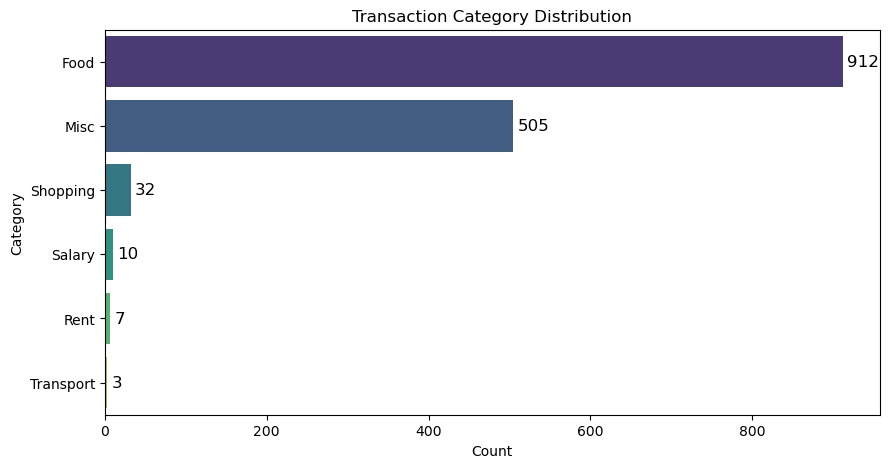

In [59]:
# Category distribution
# Compute category counts
category_counts = df["Category"].value_counts()

# Create the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, y="Category", order=category_counts.index, palette="viridis")

# Annotate each bar with its count
for bar, count in zip(ax.patches, category_counts):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{count}', ha='left', va='center', fontsize=12)

# Labels and title
plt.title("Transaction Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

### 📊 Monthly Transaction Trends
- The **line chart** shows **withdrawals and deposits** over time.
- Some months have **higher spikes**, indicating **increased spending or income**.
- If there are **seasonal trends** (e.g., rent, bonuses), we can analyze further.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

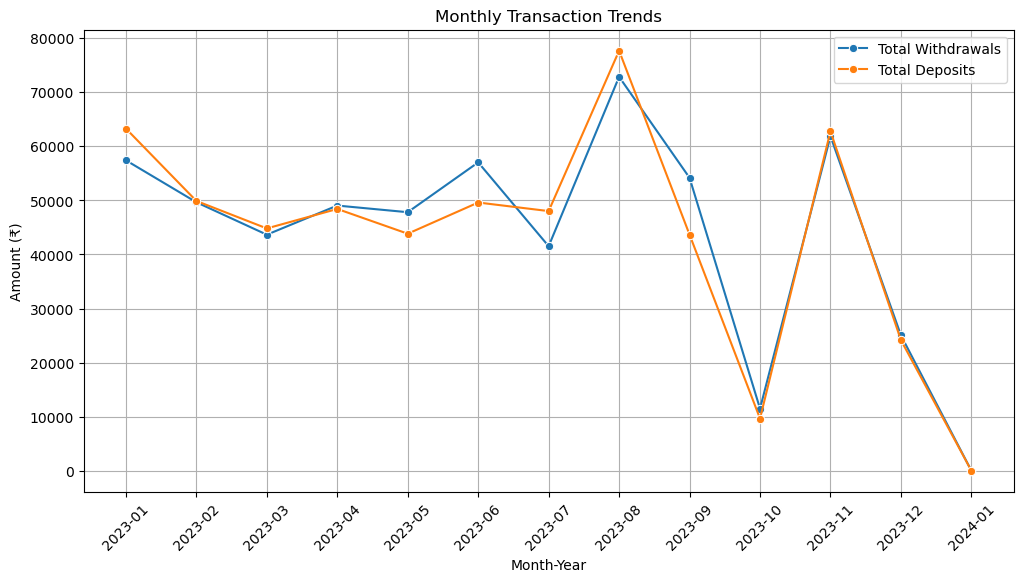

In [43]:
# Extract month-year for trend analysis
df["Year-Month"] = df["Date"].dt.to_period("M")

# Aggregate total withdrawals and deposits per month
monthly_trends = df.groupby("Year-Month")[["Withdrawal", "Deposit"]].sum()

# Plot transaction trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x=monthly_trends.index.astype(str), y="Withdrawal", label="Total Withdrawals", marker="o")
sns.lineplot(data=monthly_trends, x=monthly_trends.index.astype(str), y="Deposit", label="Total Deposits", marker="o")

plt.xticks(rotation=45)
plt.title("Monthly Transaction Trends")
plt.xlabel("Month-Year")
plt.ylabel("Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

### 🔍 Correlation Insights
- **Balance and Deposit** are **positively correlated (0.58)** → Higher deposits tend to **increase balance**.
- **Withdrawal and Balance** have a **weak negative correlation (-0.11)** → Spending doesn’t strongly affect balance (possibly due to regular deposits).
- **Withdrawal and Deposit** are **nearly uncorrelated (0.01)** → They occur **independently**.

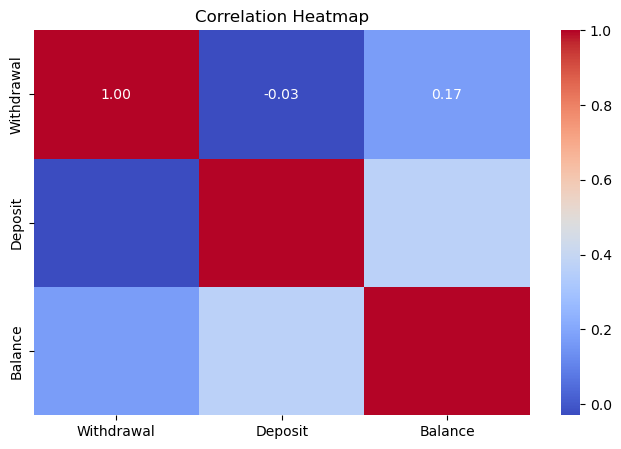

In [47]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[["Withdrawal", "Deposit", "Balance"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

### 💰 Category-Wise Spending & Deposits
- **Most spending is under "Misc" (₹460,982)** → This might need **further breakdown** to understand major expense types.
- **Food (₹48,286) and Rent (₹43,804)** are other **major expenses**.
- **Salary is the biggest deposit source (₹337,969)**, ensuring consistent income flow.

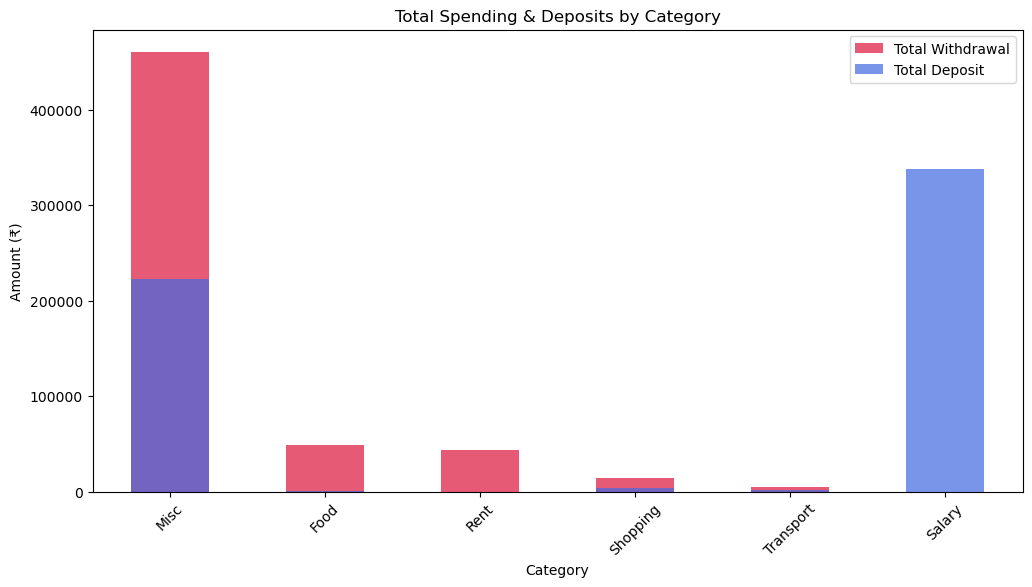

,Withdrawal,Deposit
Category,,
Misc,460982.44,222430.09
Food,48286.36,439.16
Rent,43804.00,0.00
Shopping,13823.00,3372.00
Transport,4780.00,1718.00
Salary,0.00,337969.00


In [77]:
# Aggregate total spending per category
category_spending = df.groupby("Category")[["Withdrawal", "Deposit"]].sum().sort_values(by="Withdrawal", ascending=False)

# Plot category-wise spending
plt.figure(figsize=(12, 6))
category_spending["Withdrawal"].plot(kind="bar", color="crimson", alpha=0.7, label="Total Withdrawal")
category_spending["Deposit"].plot(kind="bar", color="royalblue", alpha=0.7, label="Total Deposit")

plt.title("Total Spending & Deposits by Category")
plt.xlabel("Category")
plt.ylabel("Amount (₹)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

category_spending

<Axes: xlabel='Category'>

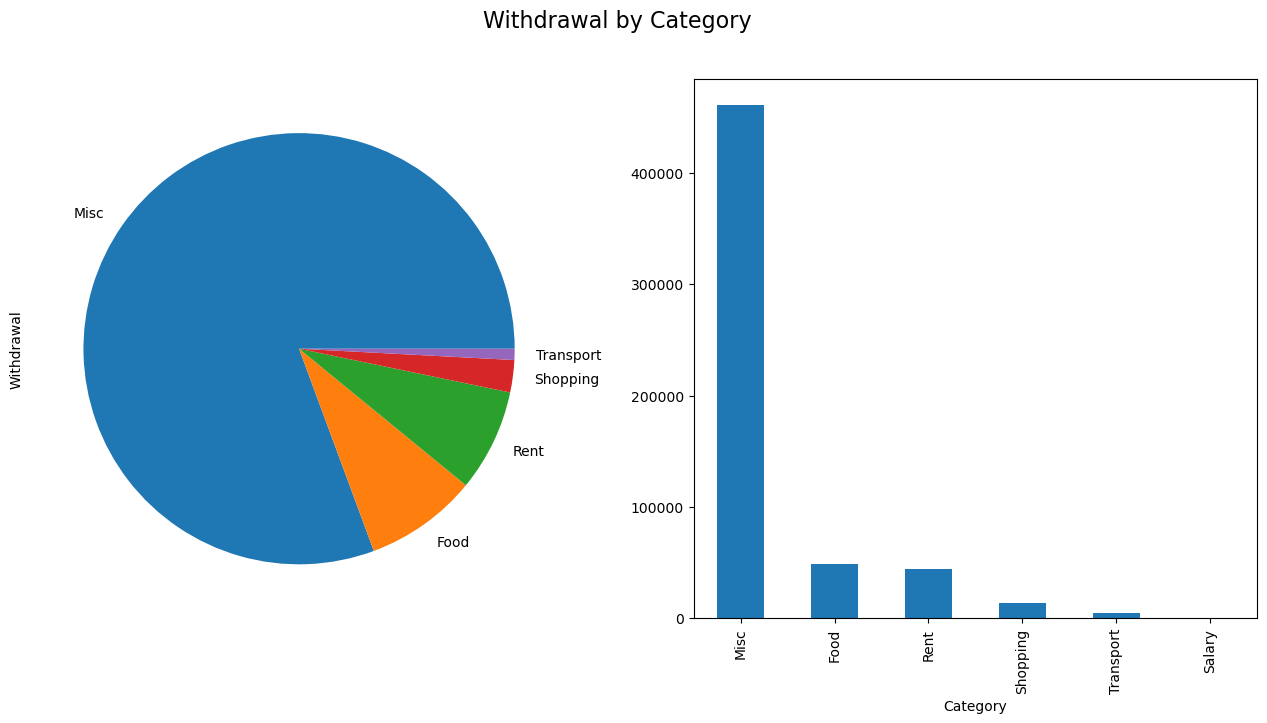

In [81]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Withdrawal by Category', fontsize=16)
df.groupby('Category')['Withdrawal'].sum().sort_values(ascending=False).plot(kind='pie', ax=axes[0])
df.groupby('Category')['Withdrawal'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1])

<Axes: xlabel='Category'>

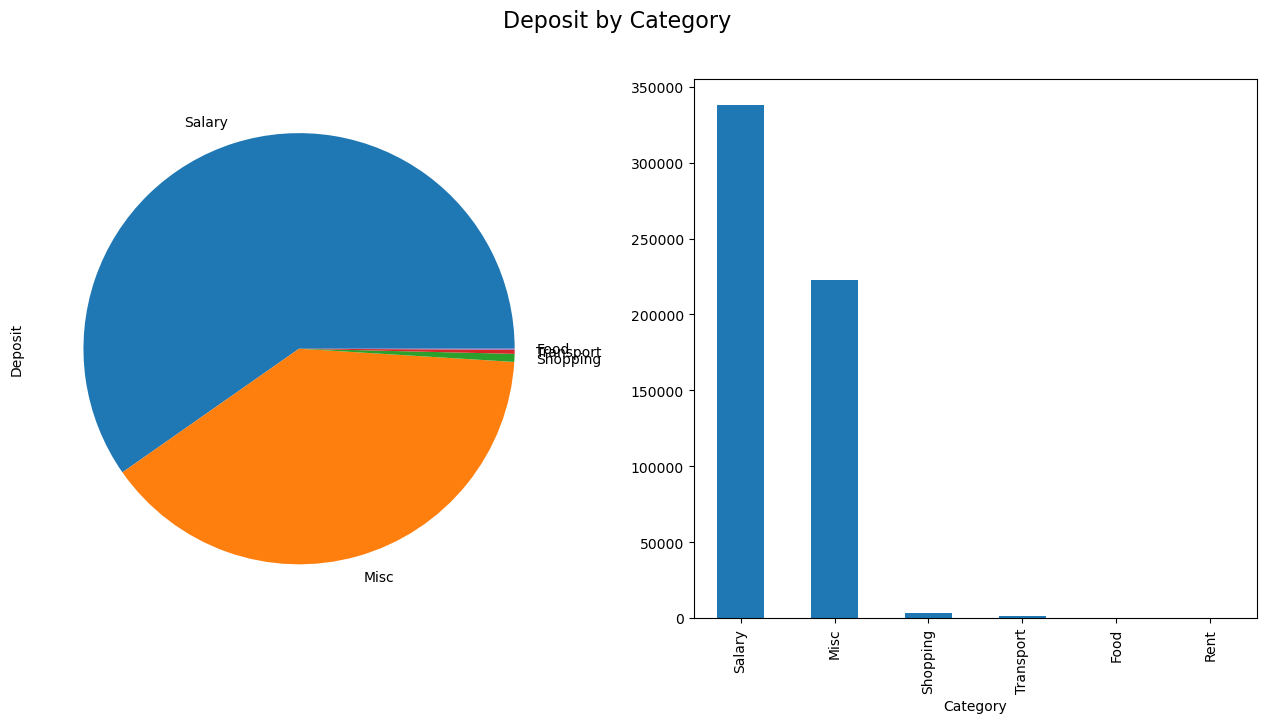

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Deposit by Category', fontsize=16)
df.groupby('Category')['Deposit'].sum().sort_values(ascending=False).plot(kind='pie', ax=axes[0])
df.groupby('Category')['Deposit'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1])

## Advanced Python Techniques

<Figure size 1000x600 with 0 Axes>

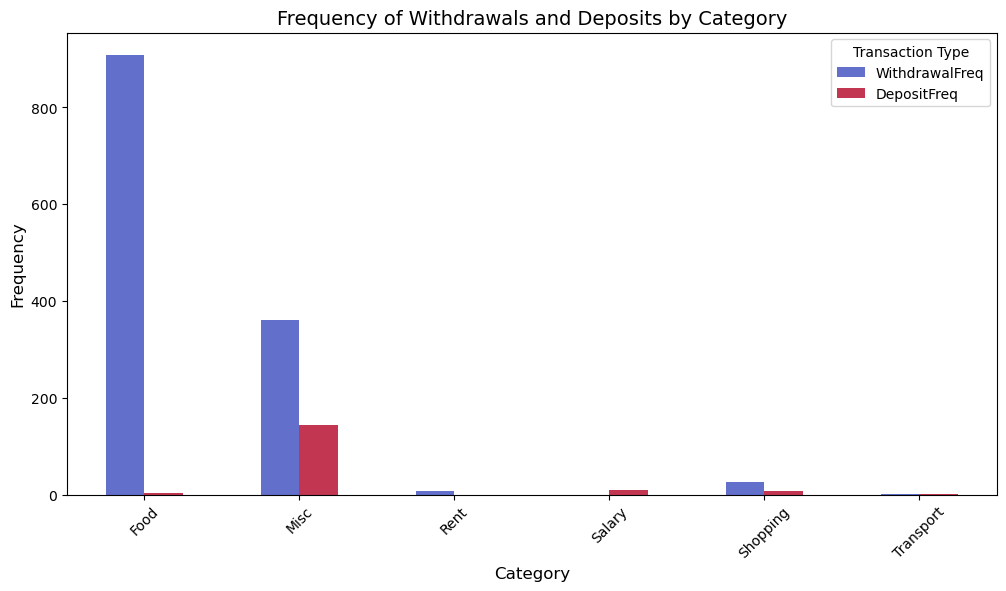

In [88]:
import matplotlib.pyplot as plt

# Group by Category and calculate withdrawal/deposit frequency
category_freq = df.groupby("Category")[["Withdrawal", "Deposit"]].agg(
    WithdrawalFreq=("Withdrawal", lambda x: (x > 0).sum()),
    DepositFreq=("Deposit", lambda x: (x > 0).sum())
)

# Plot the bar chart
plt.figure(figsize=(10, 6))
category_freq.plot(kind="bar", colormap="coolwarm", alpha=0.8, figsize=(12, 6))

# Add labels and title
plt.title("Frequency of Withdrawals and Deposits by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)  # Rotate category names for readability
plt.legend(title="Transaction Type")

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

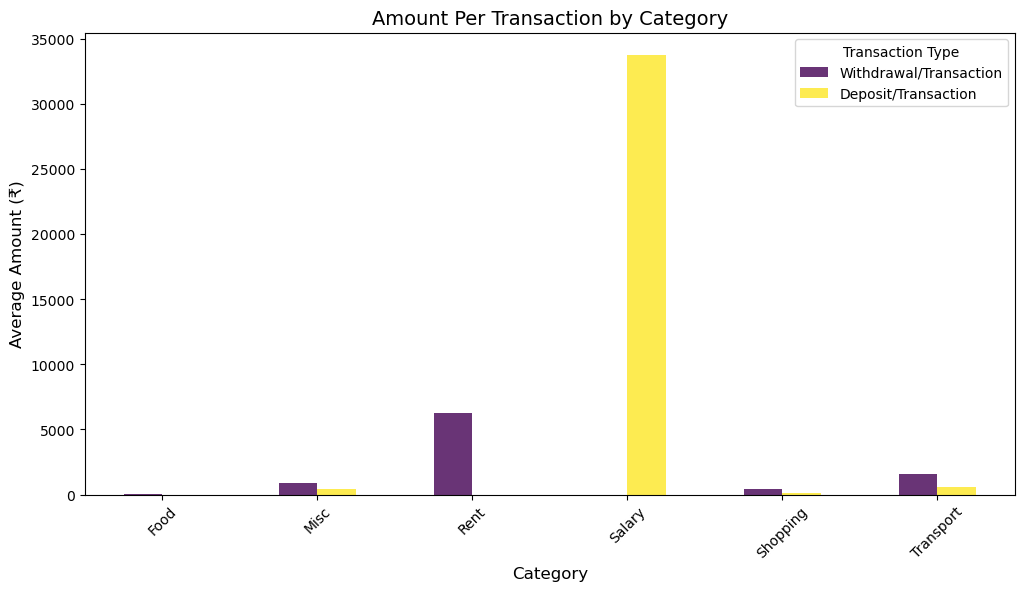

In [90]:
import matplotlib.pyplot as plt

# Calculate the amount per transaction for withdrawals and deposits
df["Withdrawal/Transaction"] = df["Withdrawal"] / df.groupby("Category")["Withdrawal"].transform("count")
df["Deposit/Transaction"] = df["Deposit"] / df.groupby("Category")["Deposit"].transform("count")

# Aggregate the sum per category
amount_per_transaction = df.groupby("Category")[["Withdrawal/Transaction", "Deposit/Transaction"]].sum()

# Plot the bar chart
plt.figure(figsize=(12, 6))
amount_per_transaction.plot(kind="bar", colormap="viridis", alpha=0.8, figsize=(12, 6))

# Add labels and title
plt.title("Amount Per Transaction by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Amount (₹)", fontsize=12)
plt.xticks(rotation=45)  # Rotate category names for readability
plt.legend(title="Transaction Type")

# Show the plot
plt.show()

In [92]:
df['Day'] = df['Date'].dt.strftime('%A').sort_values()
df['Month'] = df['Date'].dt.strftime('%B').sort_values()
df['Year'] = df['Date'].dt.year.sort_values()
df.head()

,Date,Category,Withdrawal,Deposit,Balance,Year-Month,Withdrawal/Transaction,Deposit/Transaction,Day,Month,Year
1,2023-01-01,Rent,3950.0,0.0,1837.23,2023-01,564.285714,0.000000,Sunday,January,2023
2,2023-01-03,Misc,105.0,0.0,1732.23,2023-01,0.207921,0.000000,Tuesday,January,2023
3,2023-01-03,Misc,0.0,55.0,1787.23,2023-01,0.000000,0.108911,Tuesday,January,2023
4,2023-01-03,Food,56.0,0.0,1731.23,2023-01,0.061404,0.000000,Tuesday,January,2023
5,2023-01-03,Misc,1.0,0.0,1730.23,2023-01,0.001980,0.000000,Tuesday,January,2023


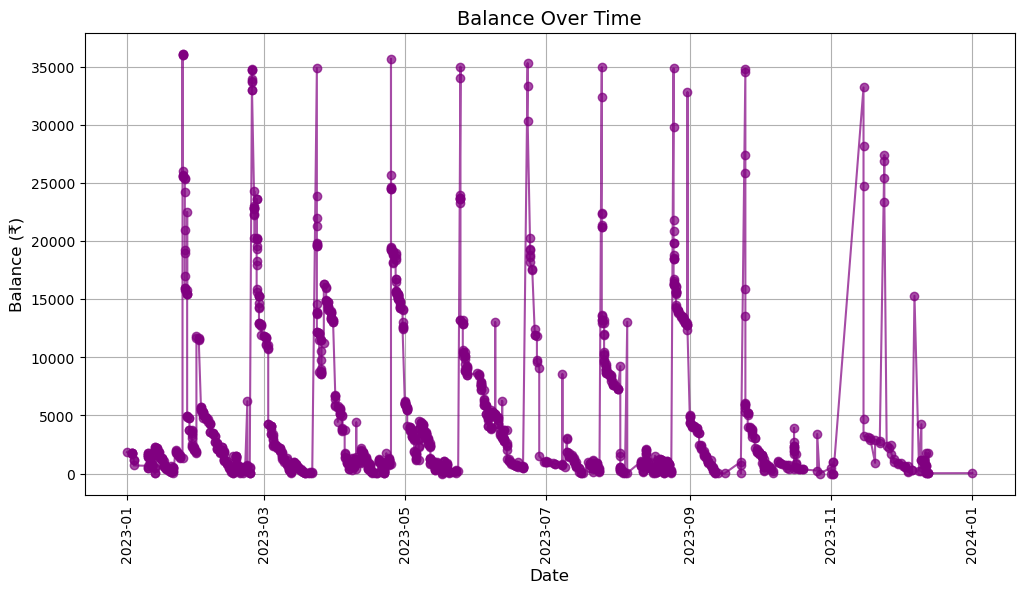

In [94]:

# Ensure 'Date' is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plot balance over time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Balance"], marker="o", linestyle="-", color="purple", alpha=0.7)

# Add labels and title
plt.title("Balance Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Balance (₹)", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()